imports and includes

In [29]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

enforce copy on write

In [30]:
#copy on write
pd.set_option('mode.copy_on_write', True)

In [31]:
cwd = Path.cwd()
root = cwd.parent
data = Path(root / 'data')

In [32]:
# generate dataframes for data files
country_platform_summary = Path(data / 'country_platform_summary_2025.csv')
cps_df = pd.read_csv(country_platform_summary)

DATA_DICTIONARY = Path(data / 'DATA_DICTIONARY.csv')
DD_df = pd.read_csv(DATA_DICTIONARY)

monthly_trends_2025 = Path(data / 'monthly_trends_2025.csv')
trends_df = pd.read_csv(monthly_trends_2025)

top_creators = Path(data / 'top_creators_impact_2025.csv')
creators_df = pd.read_csv(top_creators)


top_hashtags = Path(data / 'top_hashtags_2025.csv')
hashtags_df = pd.read_csv(top_hashtags)

yt_tt_trends = Path(data / 'youtube_shorts_tiktok_trends_2025.csv')
yt_tt_trends_df = pd.read_csv(yt_tt_trends)

yt_tt_trends_csv_ML = Path(data / 'youtube_shorts_tiktok_trends_2025.csv_ML.csv')
yt_tt_trends_ML_df = pd.read_csv(yt_tt_trends_csv_ML)

# Few things to look into here before we get started
1. Look into data dictionary and understand the insight provided relating to data
2. Check each datasets contents and understand data from each set
3. Compare the youtube and tiktok trends files, how they differ, and why

# 1. Look into data dictionary and understand the insight provided relating to data

In [33]:
# observe data dictionary shape
print("Shape of Data Dictionary = ", DD_df.shape)

Shape of Data Dictionary =  (58, 2)


In [34]:
#Just barely too long to wholly print
DD_df.head(58)

,column,description
0,platform,Platform (TikTok/YouTube)
1,country,Country ISO-2 code
2,region,Region macro label (if available)
3,language,Primary language inferred from country (fallba...
4,category,Video category (if available)
5,hashtag,Primary hashtag aligned with genre
6,title_keywords,Short realistic title-like keywords
7,author_handle,"Creator handle/channel (brand-like, synthetic)"
8,sound_type,Sound type (if present)
9,music_track,Music track (if present)


Here we can see the that data has been organized and outlined clearly. We have a well documented reference point for analyzing each of these datasets.

Note: Missing data identified w "NaN"

# 2. Check each datasets contents and understand data from each set

Initial look: Summary

In [35]:
# lets see what we can understand from these datasets, lets begin with summary dataset
print("Shape of Summary Dataset = ", cps_df.shape)

Shape of Summary Dataset =  (60, 14)


In [36]:
# another smaller dataset lets take a look
cps_df.head()

,country,platform,total_videos,total_views,median_er,p95_views,avg_duration,avg_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_engagement_per_1k,top_hashtag,top_hashtag_views
0,Ae,TikTok,1017,102064271,0.0900,325484.40,29.7335,13785.7142,0.0077,0.0068,0.0072,92.4015,#FYP,26292844
1,Ae,YouTube,641,67638733,0.0492,332142.00,41.8721,14381.0054,0.0043,0.0038,0.0040,51.2265,#FYP,18272805
2,Ar,TikTok,1032,103715112,0.0877,311367.55,29.7025,13126.5611,0.0076,0.0067,0.0071,90.0953,#FYP,27220930
3,Ar,YouTube,629,57036717,0.0491,271985.20,40.7886,12136.0476,0.0042,0.0037,0.0040,50.4033,#FYP,12738216
4,Au,TikTok,959,96885399,0.0898,306511.80,29.7404,14376.2279,0.0077,0.0068,0.0073,92.4227,#FYP,26396116


In [37]:
cps_df.tail()

,country,platform,total_videos,total_views,median_er,p95_views,avg_duration,avg_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_engagement_per_1k,top_hashtag,top_hashtag_views
55,Tr,YouTube,704,66369328,0.0486,287205.70,40.4616,13241.4636,0.0042,0.0037,0.0041,50.4683,#FYP,17739070
56,Us,TikTok,1038,99338866,0.0894,306683.60,30.2649,14159.4068,0.0077,0.0068,0.0073,92.1015,#FYP,23785161
57,Us,YouTube,642,65109764,0.0496,323309.55,40.0561,14268.7101,0.0044,0.0038,0.0040,51.8907,#FYP,16188541
58,Za,TikTok,962,90262395,0.0887,283934.60,31.2027,12976.8724,0.0076,0.0067,0.0071,91.2857,#FYP,21084944
59,Za,YouTube,641,60673149,0.0497,280924.00,40.1576,13108.5168,0.0042,0.0038,0.0041,50.9622,#FYP,14840115


Seems to be in alphabetical order of country codes. This gives us a general summary of tiktok and youtube statistics such as, video vount, view count, top hashtag per country and a viewcount of these top hashtags. Other details provided include the averages of durations, comment ratios, save and share rates, and engagement.

Initial look: Monthly Trends

In [38]:
print("Shape of Monthly Trends = ", trends_df.shape)

Shape of Monthly Trends =  (480, 8)


In [39]:
trends_df.head()

,country,platform,year_month,n_videos,views,avg_er,avg_velocity,trend_label
0,AE,TikTok,2025-01,130,14474636,0.093197,18357.548923,steady
1,AE,TikTok,2025-02,112,11873208,0.092006,14471.823839,declining
2,AE,TikTok,2025-03,129,15551725,0.088624,15883.138605,rising
3,AE,TikTok,2025-04,118,9625618,0.093185,11284.687373,declining
4,AE,TikTok,2025-05,130,12041755,0.092336,12483.081231,steady


In [40]:
trends_df.tail()

,country,platform,year_month,n_videos,views,avg_er,avg_velocity,trend_label
475,ZA,YouTube,2025-04,76,6748722,0.055431,14162.785789,declining
476,ZA,YouTube,2025-05,90,8986166,0.048751,10996.790444,rising
477,ZA,YouTube,2025-06,61,5444650,0.048903,13388.686721,declining
478,ZA,YouTube,2025-07,64,6489859,0.050448,16987.705000,steady
479,ZA,YouTube,2025-08,82,7245449,0.051070,10553.309390,steady


Keeps same organization, alphabetical by country code but also seems to be alphabetical for platform (Tiktok->Youtube). Data defined as a total view count of n videos each month from 2025, per platform, per country. Other metrics included: average engagement rate, velocity, and defined trend label.

Initial look: Top creators impact set

In [41]:
print("Shape of Top Creators Impact = ", creators_df.shape)

Shape of Top Creators Impact =  (1000, 20)


In [42]:
creators_df.head()

,author_handle,platform,n_videos,views,avg_er,likes_sum,dislikes_sum,comments_sum,shares_sum,saves_sum,total_engagements,avg_engagement_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_like_dislike_ratio,avg_engagement_per_1k,avg_like_rate,avg_dislike_rate,creator_avg_views
0,UrbanVision,TikTok,136,17938952,0.091914,1267238,36094,142403,125916,124572,1660129,17957.902500,0.007648,0.006849,0.007302,49.735210,91.913699,0.070115,0.001887,120866.4
1,BeyondStudio,TikTok,135,17085072,0.087916,1121223,31594,123017,114620,130934,1489794,17890.303481,0.007439,0.006496,0.006724,49.875449,87.915533,0.067256,0.001922,116192.9
2,StreetVision,TikTok,133,16843324,0.093018,1228515,28953,129169,114222,138762,1610668,18574.954962,0.007454,0.006886,0.007555,54.076138,93.018098,0.071123,0.001870,116083.5
3,NextMedia,TikTok,148,16325236,0.092222,1161803,29124,128881,110655,119691,1521030,15570.731419,0.007605,0.006733,0.007361,53.285924,92.222081,0.070523,0.001818,106288.7
4,PrimeLabs,TikTok,135,16240032,0.092307,1095828,28067,119613,105152,112859,1433452,15412.244000,0.007698,0.006751,0.007717,52.907430,92.306830,0.070140,0.001816,103134.2


In [43]:
creators_df.tail()

,author_handle,platform,n_videos,views,avg_er,likes_sum,dislikes_sum,comments_sum,shares_sum,saves_sum,total_engagements,avg_engagement_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_like_dislike_ratio,avg_engagement_per_1k,avg_like_rate,avg_dislike_rate,creator_avg_views
995,GuruYuki,YouTube,21,1865526,0.050216,80938,8694,9343,8018,7906,106205,9052.485714,0.004140,0.003819,0.004129,14.826263,50.215571,0.038128,0.003620,86547.9
996,OfficialSofia,TikTok,18,1858897,0.090631,126563,2813,13248,11468,15048,166327,9671.951111,0.008100,0.006263,0.006582,54.694049,90.631278,0.069687,0.001562,102487.9
997,TravelByNoor,YouTube,18,1857824,0.056072,69365,6231,7680,6363,5358,88766,12190.825556,0.004760,0.004138,0.003585,13.591240,56.071944,0.043590,0.004124,96440.7
998,TVDiego,YouTube,20,1856301,0.055188,71928,6373,8041,7128,8984,96081,13751.414500,0.004523,0.004063,0.004867,13.170205,55.187650,0.041735,0.003821,108068.4
999,BeautyByAmr,TikTok,21,1854548,0.092891,117331,2368,10812,10748,9943,148834,16431.634286,0.007505,0.006813,0.006816,49.267076,92.890762,0.071757,0.001755,90734.5


1000 creators across youtube and tiktok, ranked by number of views. Other metrics included to compare how many videos each creator posted in 2025, and each corresponding statistic, average engagement rate, total number of likes/dislikes, total comments, shares, saves etc.

Intial look: top hashtags

In [44]:
print("Shape of Top Hashtags 2025 = ", hashtags_df.shape)

Shape of Top Hashtags 2025 =  (82, 18)


In [45]:
hashtags_df.head()

,platform,hashtag,n_videos,views,likes,comments,shares,saves,avg_er,avg_engagement_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_like_dislike_ratio,avg_engagement_per_1k,avg_like_rate,avg_dislike_rate,total_engagements
0,TikTok,#FYP,7379,734064265,51402240,5651829,4998382,5348188,0.091838,13954.979633,0.007692,0.006783,0.007221,51.436016,91.837843,0.070141,0.001892,67400639
1,TikTok,#GRWM,1013,111331419,7726251,843072,753230,777258,0.091320,15906.769319,0.007638,0.006746,0.007104,49.449781,91.319729,0.069833,0.001921,10099811
2,TikTok,#Comedy,762,79538424,5748752,620867,551845,606968,0.092762,14930.337533,0.007677,0.006833,0.007625,49.351872,92.761520,0.070627,0.001941,7528432
3,TikTok,#Lifestyle,782,78531438,5437932,590141,532055,578370,0.091395,13480.843389,0.007536,0.006713,0.007324,51.094024,91.394959,0.069822,0.001843,7138498
4,TikTok,#Relatable,795,76879158,5452690,603507,527910,557667,0.092813,13024.526164,0.007796,0.006919,0.007223,48.388414,92.813268,0.070875,0.001966,7141774


In [46]:
hashtags_df.tail()

,platform,hashtag,n_videos,views,likes,comments,shares,saves,avg_er,avg_engagement_velocity,avg_comment_ratio,avg_share_rate,avg_save_rate,avg_like_dislike_ratio,avg_engagement_per_1k,avg_like_rate,avg_dislike_rate,total_engagements
77,YouTube,#Streamer,286,26276852,1060622,111847,100032,114928,0.051714,11069.796434,0.004169,0.003796,0.004284,15.895462,51.714346,0.039465,0.003200,1387429
78,YouTube,#Beauty,288,24769612,913494,104134,87134,96478,0.049295,11229.686458,0.004172,0.003589,0.003890,16.099786,49.294625,0.037644,0.003102,1201240
79,YouTube,#Crafts,35,4348818,152466,14969,14297,20097,0.048971,12933.123429,0.003670,0.003526,0.004000,15.080030,48.970571,0.037775,0.003265,201829
80,YouTube,#DIY,26,2760492,122394,12845,12735,10167,0.053638,15458.086923,0.004445,0.003892,0.004029,15.933150,53.637692,0.041272,0.003386,158141
81,YouTube,#LifeHacks,31,2435911,96785,10526,9340,10245,0.053519,12360.546129,0.004519,0.003886,0.004273,13.785287,53.518516,0.040840,0.003712,126896


Popular hashtags on both platforms ordered descending by view count or possibly number of likes. This could suggest a relationship between these two columns and even number of comments, shares and saves. Investigate these relationships later.

# 3. Compare Youtube and Tiktok Trends files

Initial look: youtube shorts tiktok trends 2025

In [47]:
print("Shape of youtube shorts tiktok trends 2025 = ", yt_tt_trends_df.shape)

Shape of youtube shorts tiktok trends 2025 =  (48079, 58)


In [48]:
yt_tt_trends_df.head()

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,Night Routine — College,NextVision,trending,8bit loop,...,External,1,2e681528d17a1fe1986857942536ec27,30317,0.086159,0.004004,120.069,0.086159,0.012555,0.007830
1,TikTok,Se,Europe,sv,Food,#Sports,Morning Routine — College,DailyVlogsDiego,trending,Street vibe,...,Search,0,2e35fa0b2978b9cae635839c1d4e9e74,30577,0.085298,0.002421,113.005,0.085298,0.007850,0.007791
2,TikTok,Za,Africa,en,Art,#Workout,Night Routine — College,BeyondHub,licensed,Gallery pad,...,External,1,0d88a011235a82244995ef52961f9502,503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146
3,TikTok,Kr,Asia,ko,News,#Esports,Best Settings for Fortnite,NextHub,original,Neutral piano,...,Search,1,e15cff7621ed3f9eb9d2c97c841be0f3,7828,0.086257,0.003164,108.156,0.086257,0.011205,0.005292
4,TikTok,Au,Oceania,en,Beauty,#Comedy,When your friend is Beginners,LucasOfficial,licensed,Soft glam loop,...,ForYou,1,d696b4f0a50ea70e7cb5021be7e198ec,1171,0.051441,0.001175,72.400,0.051441,0.004204,0.004142


In [49]:
yt_tt_trends_df.tail()

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
48074,YouTube,Ke,Africa,sw,Lifestyle,#Motivation,Weekly Reset — Beginners,NoahChannel,licensed,Chill guitar,...,Search,0,a756bd218ad29bce51bad0fac806a857,2904,0.025804,0.001247,33.216,0.025804,0.003454,0.002059
48075,YouTube,Sa,Asia,ar,Art,#DanceChallenge,Weekly Reset — Beginners,MrYuki,trending,Gallery pad,...,Home,1,0aeb762f68a9867eaf0b937006933021,2461,0.040411,0.005011,49.725,0.040411,0.003213,0.003617
48076,YouTube,Kr,Asia,ko,Science,#Comedy,When your friend is 2025,LifeOfAyaka,original,Lab beeps,...,Suggested,1,78ebd3268e18a3033895739c44680d82,1415,0.033513,0.003593,43.827,0.033513,0.004027,0.004119
48077,YouTube,Br,South America,pt,Pets,#OOTD,GRWM: Beginners Edition,TechieNoah,trending,Cute whistle,...,Home,1,67fd2032ade8be89da4c0208fbc05596,2457,0.043857,0.003594,59.272,0.043857,0.006465,0.003088
48078,YouTube,Pl,Europe,pl,Education,#Streamer,New Patch Tips for Fortnite,BeyondStudio,original,Calm piano,...,External,0,d985bcfe0e19119e396e87fbc4f7ef5d,3966,0.049392,0.005831,62.167,0.049392,0.004373,0.005298


Trending content from tiktok and youtube across various countries including relevant metrics. 

# Note: I'm unsure how these are defined as trending, what metrics they're organized by.

Initial look: youtube shorts tiktok trends 2025 ML

In [50]:
print("Shape of youtube shorts tiktok trends 2025 ML = ", yt_tt_trends_ML_df.shape)

Shape of youtube shorts tiktok trends 2025 ML =  (50000, 32)


Note different size from yt_tt_trends

In [51]:
yt_tt_trends_ML_df.head()

,trend_label,platform,region,language,category,traffic_source,device_brand,creator_tier,title_len,text_richness,...,share_hashtag_interaction,platform_cat,region_cat,language_cat,category_cat,traffic_source_cat,device_brand_cat,creator_tier_cat,richness_traffic_interaction,weekend_hashtag_boost
0,stable,youtube,Africa,es,Food,search,samsung,nano,2,1.999998,...,0.056675,1,0,3,3,4,5,3,9.999990,0
1,stable,youtube,Europe,it,Comedy,feed,apple,micro,2,1.999998,...,0.092987,1,3,6,1,1,0,1,3.999996,0
2,stable,tiktok,Americas,en,Tech,search,google,micro,2,1.999998,...,0.064086,0,1,2,9,4,1,1,9.999990,0
3,rising,tiktok,Americas,ar,Comedy,feed,huawei,mid,2,1.999998,...,0.182443,0,1,0,1,1,2,2,3.999996,0
4,stable,tiktok,Americas,pt,Beauty,search,apple,nano,2,1.999998,...,0.098327,0,1,9,0,4,0,3,9.999990,0


In [52]:
yt_tt_trends_ML_df.tail()

,trend_label,platform,region,language,category,traffic_source,device_brand,creator_tier,title_len,text_richness,...,share_hashtag_interaction,platform_cat,region_cat,language_cat,category_cat,traffic_source_cat,device_brand_cat,creator_tier_cat,richness_traffic_interaction,weekend_hashtag_boost
49995,stable,youtube,Africa,en,Food,profile,samsung,nano,2,1.999998,...,0.032991,1,0,2,3,3,5,3,7.999992,0
49996,stable,tiktok,Americas,en,News,hashtag,apple,micro,3,2.999997,...,0.065294,0,1,2,7,2,0,1,8.999991,0
49997,stable,youtube,Americas,hi,Lifestyle,hashtag,samsung,mid,2,1.999998,...,0.046140,1,1,5,5,2,5,2,5.999994,0
49998,declining,youtube,Asia,hi,News,hashtag,samsung,nano,3,2.999997,...,0.014437,1,2,5,7,2,5,3,8.999991,1
49999,stable,youtube,Europe,en,Tech,feed,samsung,micro,2,1.999998,...,0.080755,1,3,2,9,1,5,1,3.999996,0


In [ ]:
# Compute the distribution of the trend_label classes and normalize to percentages for model evaluation
ml = pd.read_csv('../data/youtube_shorts_tiktok_trends_2025.csv_ML.csv')
ml['trend_label'].value_counts()
ml['trend_label'].value_counts(normalize=True)

(trend_label
 stable       27696
 rising       12500
 declining     5098
 seasonal      4706
 Name: count, dtype: int64,
 trend_label
 stable       0.55392
 rising       0.25000
 declining    0.10196
 seasonal     0.09412
 Name: proportion, dtype: float64)

# another one idk how to define

Quite different from other dataset, including a trend label...

# Next Steps: EDA

Now that we have a clearer view of each set and its contents, we want to start exploring the data and the relationships columns might hold with each other. Where should we start?

I want to begin by trying to paint this picture with that summary data, this way we can infer possible relationships, and confirm those using the raw data to help us further understand what succeeds in social media and why.

/var/folders/__/bpfq3m310fl37hcpsvf0fhd80000gn/T/ipykernel_99243/385943754.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cps_df, x="country", y="total_views", hue="platform", ci=None)


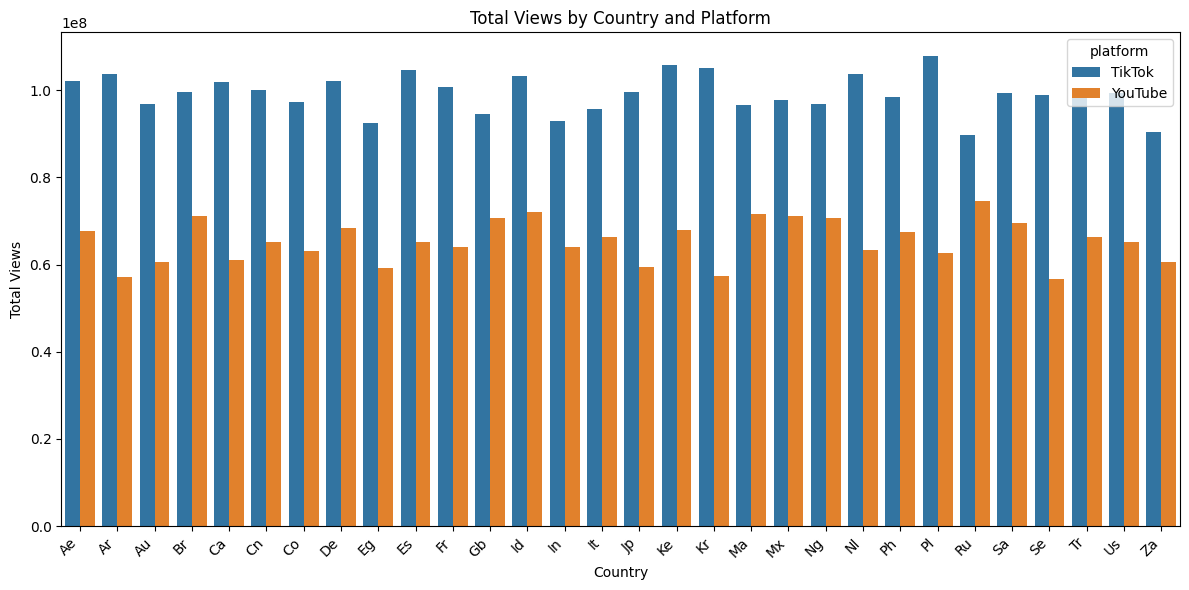

In [53]:
# lets look at the total views and videos for each country on both platforms
plt.figure(figsize=(12, 6))
sns.barplot(data=cps_df, x="country", y="total_views", hue="platform", ci=None)

plt.title("Total Views by Country and Platform")
plt.xlabel("Country")
plt.ylabel("Total Views")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ok im very bad at this, i wanted to generate two separate histograms, one for tiktok and the other for youtube and compare views across the platforms. 

I also thought to do the same for video count to try and identify a relationship between the number of videos and viewcount. but this plot doesnt help with this at all, 

1 because its combined with both platforms, 

and 2 because its y axis is from 0-1. the actual view count is not clear. 

if youd like to tackle this and generate 4 histograms more clearly showing a view count per country on both platforms with two, and the other two showing the number of videos per country on both platforms, give it a go if you think this would be a good place to start. 

Note if these plots are still scuffed. make a note of it and then try removing NaNs. just wanted to try this first and then document and show reasoning for removing NaNs if they exist in these columns.

Lets start plotting columns against each other to see if we can find any linear relationships. Starting with the creators_df dataset because it has lots of data to explore.

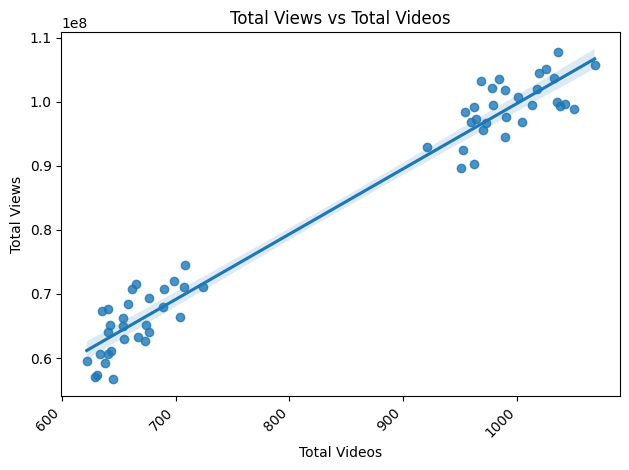

        total_views  total_videos
count  6.000000e+01     60.000000
mean   8.225318e+07    828.400000
std    1.770085e+07    170.134961
min    5.665754e+07    622.000000
25%    6.514869e+07    657.250000
50%    8.203921e+07    822.500000
75%    9.937930e+07    989.000000
max    1.078324e+08   1068.000000


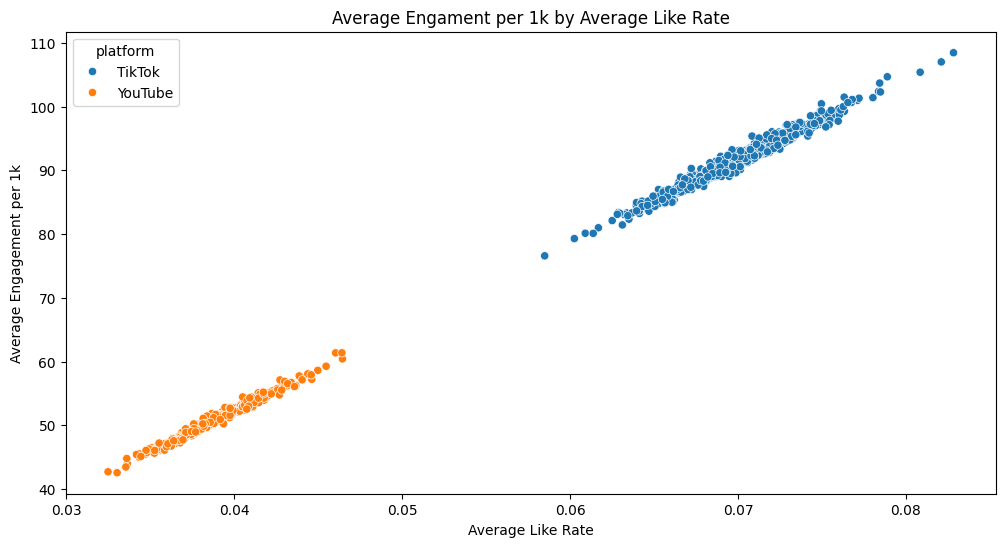

       avg_like_rate  avg_engagement_per_1k
count    1000.000000            1000.000000
mean        0.057960              75.878799
std         0.015464              20.263305
min         0.032481              42.553286
25%         0.039612              51.742040
50%         0.067228              88.186849
75%         0.070805              92.520398
max         0.082840             108.453476


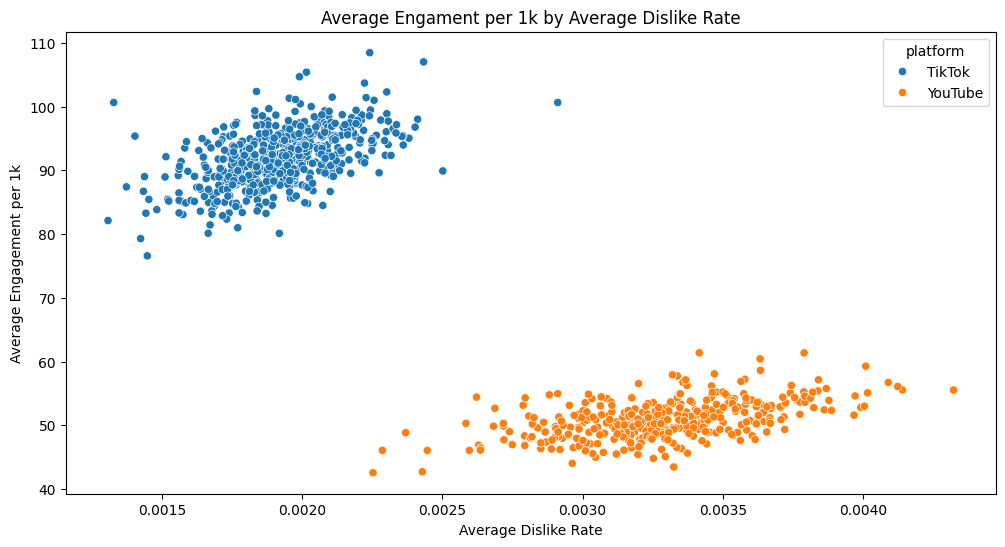

       avg_dislike_rate  avg_engagement_per_1k
count       1000.000000            1000.000000
mean           0.002449              75.878799
std            0.000713              20.263305
min            0.001307              42.553286
25%            0.001878              51.742040
50%            0.002075              88.186849
75%            0.003185              92.520398
max            0.004324             108.453476


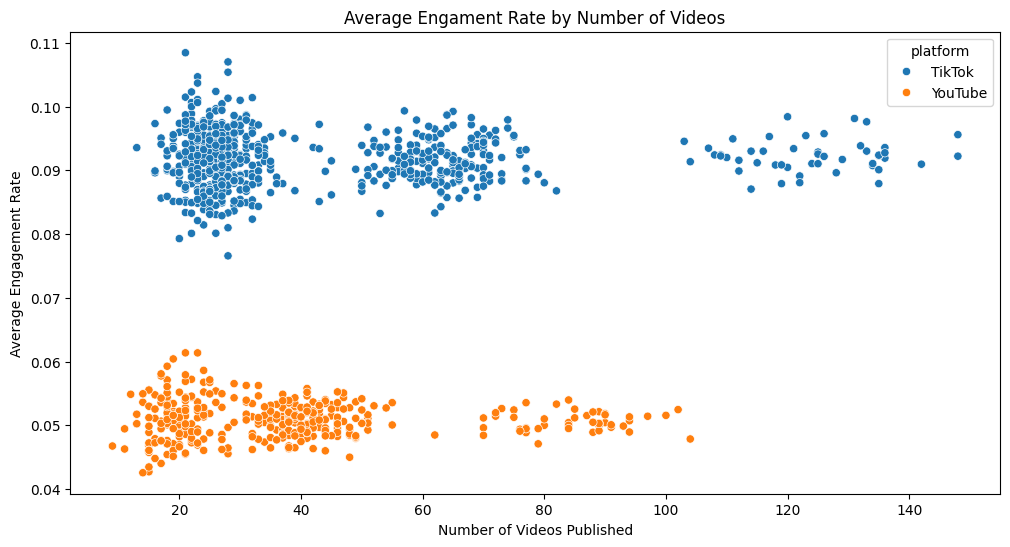

          n_videos       avg_er
count  1000.000000  1000.000000
mean     42.465000     0.075879
std      26.342869     0.020263
min       9.000000     0.042553
25%      24.000000     0.051742
50%      32.000000     0.088187
75%      56.000000     0.092520
max     148.000000     0.108453


In [54]:
sns.regplot(data=cps_df, x="total_videos", y="total_views", scatter=True)
plt.title("Total Views vs Total Videos")
plt.xlabel("Total Videos")
plt.ylabel("Total Views")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
des_stats1 = cps_df[["total_views", "total_videos"]]
print(des_stats1.describe())
plt.figure(figsize=(12, 6))
sns.scatterplot(data=creators_df, x="avg_like_rate", y="avg_engagement_per_1k", hue="platform")
plt.title("Average Engament per 1k by Average Like Rate")
plt.xlabel("Average Like Rate")
plt.ylabel("Average Engagement per 1k")
plt.show()
des_stats2 = creators_df[["avg_like_rate", "avg_engagement_per_1k"]]
print(des_stats2.describe())
plt.figure(figsize=(12, 6))
sns.scatterplot(data=creators_df, x="avg_dislike_rate", y="avg_engagement_per_1k", hue="platform")
plt.title("Average Engament per 1k by Average Dislike Rate")
plt.xlabel("Average Dislike Rate")
plt.ylabel("Average Engagement per 1k")
plt.show()
des_stats3 = creators_df[["avg_dislike_rate", "avg_engagement_per_1k"]]
print(des_stats3.describe())
plt.figure(figsize=(12, 6))
sns.scatterplot(data=creators_df, x="n_videos", y="avg_er", hue="platform")
plt.title("Average Engament Rate by Number of Videos")
plt.xlabel("Number of Videos Published")
plt.ylabel("Average Engagement Rate")
plt.show()
des_stats4 = creators_df[["n_videos", "avg_er"]]
print(des_stats4.describe())

So far we can see some candidates that can be good to analyze. Need to plot many more relationships to get a better picture. Lots of these pairs are intuitive to predict if there will be linear correlation or not, like channels with high video counts having high view counts. Want to explore more of the relationship between negative and positive feedback on a videp with performance. Observing that TikTok seems to in general hvae higher engagement rates across the board compared to YouTube, would like to compare this to region and maybe upload time as well. 

Lets explore some stuff from yt_tt_trends_ML_df, a data set that contains information on trends from Youtube and TikTok cleaned up with ML.

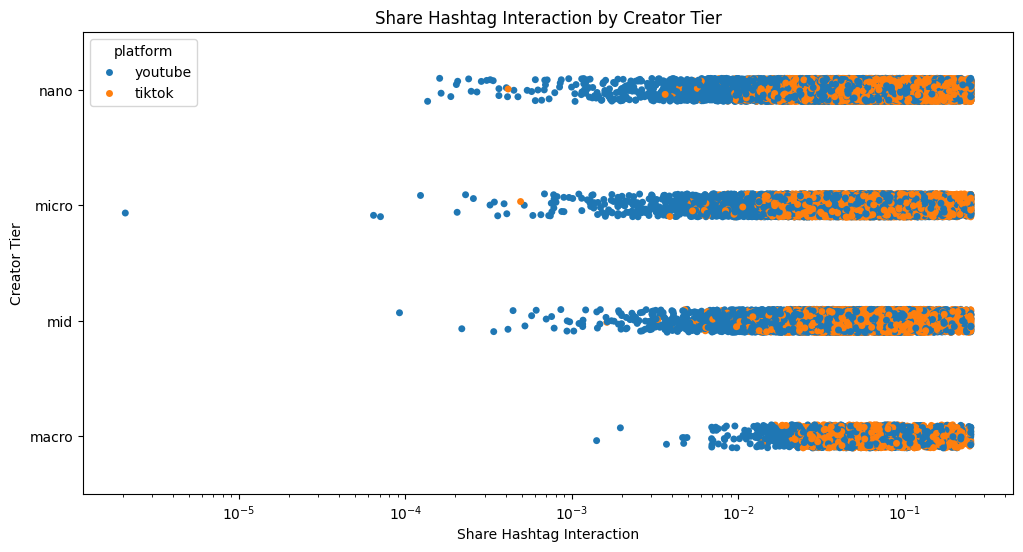

count    50000.000000
mean         0.066358
std          0.047522
min          0.000000
25%          0.031078
50%          0.054839
75%          0.090015
max          0.250000
Name: share_hashtag_interaction, dtype: float64


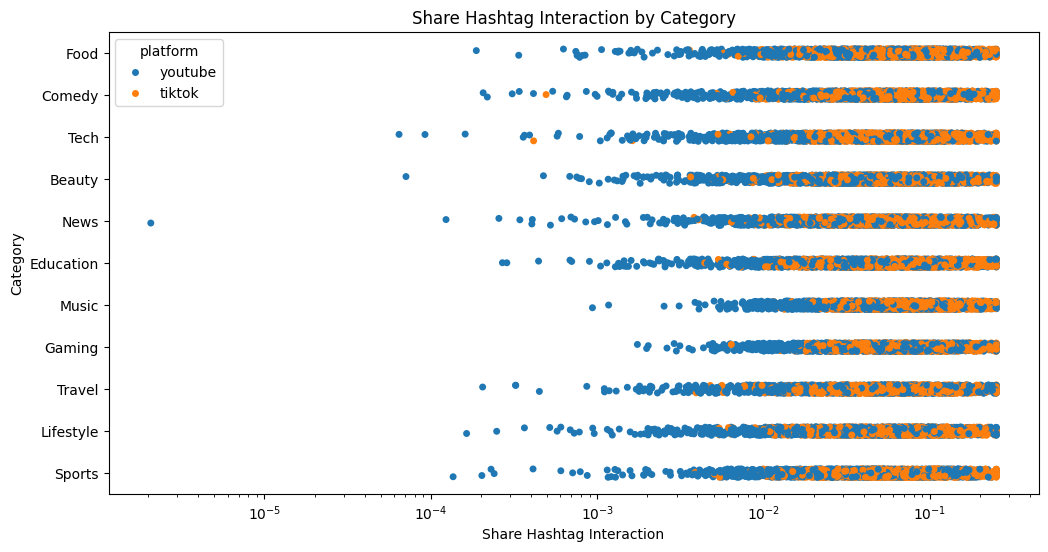

In [55]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=yt_tt_trends_ML_df, x="share_hashtag_interaction", y="creator_tier", 
              hue ="platform", log_scale=True)
plt.title("Share Hashtag Interaction by Creator Tier")
plt.xlabel("Share Hashtag Interaction")
plt.ylabel("Creator Tier")
plt.show()
des_stats5 = yt_tt_trends_ML_df["share_hashtag_interaction"]
print(des_stats5.describe())
plt.figure(figsize=(12, 6))
sns.stripplot(data=yt_tt_trends_ML_df, x="share_hashtag_interaction", y="category", 
              hue ="platform", log_scale=True)
plt.title("Share Hashtag Interaction by Category")
plt.xlabel("Share Hashtag Interaction")
plt.ylabel("Category")
plt.show()